In [1]:

import pandas as pd


D:\python_projects\meta-select\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features = pd.read_csv("../resources/tabzilla/filtered/features.csv", index_col=0)

In [3]:
metrics = pd.read_csv("../resources/tabzilla/target/metrics__raw.csv", index_col=0)

In [4]:
datasets = features.merge(metrics, on="dataset_name").index

In [5]:
features = features.loc[datasets]
metrics = metrics.loc[datasets]

In [6]:
from sklearn.model_selection import KFold
from ms.processing.split import split

outer_split = KFold(n_splits=5, shuffle=True, random_state=42)
data_splits = split(features, metrics, outer_split)

In [7]:
from ms.metaresearch.selectors.model_free import CorrelationInnerSelector

corr_inner_selector = CorrelationInnerSelector(
    corr_type="spearman",
    corr_threshold=0.9,
    vif_count_threshold=50,
    vif_value_threshold=None,
)

In [8]:
# experiment(
x_train = features.iloc[data_splits[0]["train"]]
x_test = features.iloc[data_splits[0]["test"]]
y_train = metrics.iloc[data_splits[0]["train"]]
y_test = metrics.iloc[data_splits[0]["test"]]
feature = "f__pymfe.general.freq_class.sd"
model_name = "LinearModel"
# )

In [9]:
x_train

,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.freq_class.max,f__pymfe.general.freq_class.mean,f__pymfe.general.freq_class.min,f__pymfe.general.freq_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.general.inst_to_attr,f__pymfe.general.nr_attr,...,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.statistical.t_mean.max,f__pymfe.statistical.t_mean.mean,f__pymfe.statistical.t_mean.min,f__pymfe.statistical.t_mean.sd,f__pymfe.statistical.t_mean.skewness,f__pymfe.statistical.var.kurtosis,f__pymfe.statistical.var.min,f__pymfe.statistical.var.skewness,f__pymfe.statistical.w_lambda
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Amazon_employee_access__34539,0.000343,NaN,-2.750000,0.942110,0.500000,0.057890,0.625238,1.703734e-17,2912.800000,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openml__Australian__146818,0.025362,1.333333,-2.750000,0.555072,0.500000,0.444928,0.077884,0.000000e+00,39.428571,14.0,...,-1.158670,139.718675,55.202460,1.723193,48.311854,0.630474,-1.415024,1.627868e+01,0.497348,0.674820
openml__GesturePhaseSegmentationProcessed__14969,0.004051,0.000000,-2.180579,0.298795,0.200000,0.101084,0.091933,-6.705847e-02,246.825000,32.0,...,3.840540,0.007441,0.000824,-0.000047,0.001943,2.280981,-0.022143,9.100091e-07,1.043820,0.668554
openml__JapaneseVowels__3510,0.001757,0.000000,-1.061513,0.162032,0.111111,0.078506,0.027600,6.703305e-01,569.200000,14.0,...,3.983511,17.827381,1.846290,-0.538388,5.119511,2.271923,7.178639,9.603790e-03,2.922296,0.001160
openml__MagicTelescope__3954,0.000657,0.000000,-2.750000,0.648370,0.500000,0.351630,0.209827,-1.666148e-16,1521.600000,10.0,...,2.927767,191.763499,29.270214,0.128719,58.628761,2.072411,-0.483390,1.221255e-02,0.969282,0.672392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
openml__vowel__3022,0.015152,0.200000,NaN,0.090909,0.090909,0.090909,0.000000,NaN,66.000000,12.0,...,0.932925,1.888459,-0.118569,-3.212843,1.288352,-0.980482,1.271441,2.133541e-01,1.520120,0.039518
openml__walking-activity__9945,0.000033,0.000000,0.652098,0.147262,0.045455,0.006101,0.040517,1.338564e+00,29866.400000,4.0,...,-1.693705,145.335954,38.185172,-1.433981,71.576673,0.741166,-1.687500,7.685290e+00,0.750000,0.306742
openml__wdbc__9946,0.065905,0.000000,-2.750000,0.627416,0.500000,0.372584,0.180194,-2.235409e-17,15.173333,30.0,...,9.520096,730.477657,53.264878,0.003258,165.710994,3.277616,17.120463,7.001721e-06,4.175469,0.221795


In [10]:
x_test

,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.freq_class.max,f__pymfe.general.freq_class.mean,f__pymfe.general.freq_class.min,f__pymfe.general.freq_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.general.inst_to_attr,f__pymfe.general.nr_attr,...,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.statistical.t_mean.max,f__pymfe.statistical.t_mean.mean,f__pymfe.statistical.t_mean.min,f__pymfe.statistical.t_mean.sd,f__pymfe.statistical.t_mean.skewness,f__pymfe.statistical.var.kurtosis,f__pymfe.statistical.var.min,f__pymfe.statistical.var.skewness,f__pymfe.statistical.w_lambda
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__LED-display-domain-7digit__125921,0.017500,0.000000,-0.326213,0.115500,0.100000,0.074000,0.012065,-7.366039e-01,57.142857,7.0,...,-0.636686,1.000000,0.756667,0.326667,0.219489,-8.398355e-01,-0.938760,0.149224,-7.123433e-01,0.005311
openml__acute-inflammations__10089,0.062500,5.000000,-2.750000,0.583333,0.500000,0.416667,0.117851,3.643105e-16,16.000000,6.0,...,NaN,38.665862,38.665862,38.665862,NaN,NaN,NaN,3.314673,NaN,0.455821
openml__ada_agnostic__3896,0.013152,0.000000,-2.750000,0.751863,0.500000,0.248137,0.356188,6.922198e-17,76.033333,48.0,...,12.787048,626.859025,32.827580,0.000000,121.720697,3.679162e+00,9.652990,0.000000,3.203182e+00,0.641198
openml__analcatdata_dmft__3560,0.006274,NaN,-0.879620,0.194478,0.166667,0.154174,0.015000,8.847800e-01,159.400000,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openml__anneal__2867,0.052895,5.333333,-0.964230,0.761693,0.200000,0.008908,0.316213,1.036001e+00,18.905263,38.0,...,-1.610039,768.289710,213.883980,0.000000,341.185646,6.754565e-01,-0.093910,0.758986,1.354577e+00,0.478345
openml__bank-marketing__9899,0.004424,1.285714,-2.750000,0.884760,0.500000,0.115240,0.544133,-3.880247e-17,226.050000,16.0,...,0.094038,600.674833,122.277224,-1.000000,222.673172,1.328965e+00,0.795551,2.868190,1.619666e+00,0.821356
openml__banknote-authentication__10093,0.003644,0.000000,-2.750000,0.555393,0.500000,0.444607,0.078338,0.000000e+00,274.400000,4.0,...,-1.882760,2.327586,0.687395,-0.778847,1.276704,1.495702e-01,-1.995139,4.414502,3.716595e-01,0.135067
openml__car-evaluation__146192,0.015191,NaN,-1.816393,0.700232,0.250000,0.037616,0.312366,5.938156e-01,65.828571,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openml__climate-model-simulation-crashes__146819,0.041667,0.000000,-2.750000,0.914815,0.500000,0.085185,0.586637,-2.982896e-17,24.000000,18.0,...,-0.662913,0.514149,0.500016,0.485436,0.007952,-4.005263e-02,-0.765070,0.081040,2.010909e-01,0.714433


In [11]:
from ms.processing.preprocess import scale, fill_na
from dowhy import CausalModel

# def experiment(
#         x_train, 
#         x_test, 
#         y_train, 
#         y_test,
#         feature,
#         model_name,
# ):
x_train_scaled = fill_na(x_train)
x_train_scaled, x_train_scaler = scale(x_train_scaled, "quantile")

x_test_scaled = fill_na(x_test)
x_test_scaled, x_test_scaler = scale(x_test_scaled, "quantile")

y_train_scaled = fill_na(y_train)
y_train_scaled, y_train_scaler = scale(y_train_scaled, "quantile")

y_test_scaled = fill_na(y_test)
y_test_scaled, y_test_scaler = scale(y_test_scaled, "quantile")

corr_res, corr_features = corr_inner_selector.compute_select(
    x_train_scaled,
    y_train_scaled,
)
x_train_corr = x_train_scaled.copy()
x_test_corr = x_test_scaled.copy()
x_train_scaled = x_train_scaled.loc[:, corr_features]
x_test_scaled = x_test_scaled.loc[:, corr_features]

D:\python_projects\meta-select\ms\metaresearch\data_preprocess.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(values, inplace=True)
D:\python_projects\meta-select\venv\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (104). n_quantiles is set to n_samples.
  warnings.warn(
D:\python_projects\meta-select\ms\metaresearch\data_preprocess.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(values, inplace=True)
D:\python_projects\meta-select\venv\lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_

In [12]:
# x_train_scaled["treatment"] = categorize_feature(
#     x_train_scaled[feature], 
#     bins=2
# ).values
x_train_scaled["outcome"] = y_train_scaled[model_name]
# x_test_scaled["treatment"] = categorize_feature(
#     x_test_scaled[feature],
#     bins=2
# ).values
x_test_scaled["outcome"] = y_test_scaled[model_name]

In [13]:
x_train_scaled

,f__pymfe.model-based.tree_shape.sd,f__pymfe.landmarking.elite_nn.sd,f__pymfe.statistical.sparsity.max,f__pymfe.statistical.skewness.sd,f__pymfe.landmarking.worst_node.min,f__pymfe.model-based.leaves_corrob.max,f__pymfe.statistical.min.mean,f__pymfe.statistical.range.kurtosis,f__pymfe.model-based.nodes_repeated.min,f__pymfe.model-based.nodes_repeated.sd,...,f__pymfe.landmarking.elite_nn.skewness,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.nr_bin,f__pymfe.landmarking.random_node.kurtosis,f__pymfe.landmarking.one_nn.skewness,f__pymfe.landmarking.elite_nn.kurtosis,f__pymfe.general.freq_class.skewness,f__pymfe.statistical.h_mean.min,f__pymfe.statistical.nr_norm,outcome
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Amazon_employee_access__34539,0.500000,0.500000,0.184466,0.500000,0.500000,0.500000,0.500000,0.504854,0.500000,0.500000,...,0.500000,0.000000,0.000000,0.500000,0.500000,0.500000,0.436893,0.000000,0.000000,0.805825
openml__Australian__146818,0.669903,0.757282,0.703883,0.223301,0.883495,0.398058,0.660194,0.223301,0.689320,0.718447,...,0.058252,0.000000,0.878641,0.184466,0.941748,0.902913,0.344660,0.902913,0.000000,0.640777
openml__GesturePhaseSegmentationProcessed__14969,0.077670,0.155340,0.058252,0.757282,0.233010,0.038835,0.194175,0.271845,0.844660,0.747573,...,0.786408,0.776699,0.000000,0.805825,0.980583,0.038835,0.097087,0.000000,0.000000,0.048544
openml__JapaneseVowels__3510,0.145631,0.126214,0.271845,0.174757,0.087379,0.213592,0.184466,0.786408,0.834951,0.737864,...,0.747573,0.922330,0.000000,0.689320,0.932039,0.786408,0.941748,0.000000,0.000000,0.689320
openml__MagicTelescope__3954,0.106796,0.087379,0.087379,0.650485,0.922330,0.155340,0.038835,0.320388,0.970874,0.805825,...,0.281553,0.000000,0.000000,0.699029,0.281553,0.203883,0.135922,0.000000,0.000000,0.456311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
openml__vowel__3022,0.650485,0.611650,0.728155,0.029126,0.029126,0.184466,0.126214,0.699029,0.718447,0.368932,...,0.951456,0.000000,0.635922,0.106796,0.174757,0.398058,0.504854,0.000000,0.941748,0.194175
openml__walking-activity__9945,0.019417,0.000000,0.135922,0.281553,0.019417,0.029126,0.067961,0.126214,0.990291,0.980583,...,0.796117,0.970874,0.000000,0.203883,0.922330,0.601942,0.970874,0.000000,0.000000,0.009709
openml__wdbc__9946,0.912621,0.640777,0.116505,0.368932,0.932039,0.951456,0.825243,0.912621,0.000000,0.097087,...,0.184466,0.000000,0.000000,0.679612,0.087379,0.660194,0.242718,0.000000,0.805825,0.864078


In [14]:
x_test_scaled

,f__pymfe.model-based.tree_shape.sd,f__pymfe.landmarking.elite_nn.sd,f__pymfe.statistical.sparsity.max,f__pymfe.statistical.skewness.sd,f__pymfe.landmarking.worst_node.min,f__pymfe.model-based.leaves_corrob.max,f__pymfe.statistical.min.mean,f__pymfe.statistical.range.kurtosis,f__pymfe.model-based.nodes_repeated.min,f__pymfe.model-based.nodes_repeated.sd,...,f__pymfe.landmarking.elite_nn.skewness,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.nr_bin,f__pymfe.landmarking.random_node.kurtosis,f__pymfe.landmarking.one_nn.skewness,f__pymfe.landmarking.elite_nn.kurtosis,f__pymfe.general.freq_class.skewness,f__pymfe.statistical.h_mean.min,f__pymfe.statistical.nr_norm,outcome
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__LED-display-domain-7digit__125921,0.192308,0.153846,0.615385,0.192308,0.153846,0.153846,0.326923,0.500000,0.000000,0.769231,...,0.076923,0.961538,0.846154,0.153846,0.153846,0.153846,0.000000,0.000000,0.000000,0.384615
openml__acute-inflammations__10089,1.000000,0.923077,0.500000,0.500000,1.000000,0.923077,0.923077,0.500000,0.923077,0.480769,...,0.000000,0.000000,0.807692,0.000000,0.076923,0.923077,0.615385,1.000000,0.000000,1.000000
openml__ada_agnostic__3896,0.153846,0.307692,1.000000,0.500000,0.826923,0.384615,0.846154,0.807692,0.000000,0.961538,...,0.307692,0.000000,1.000000,1.000000,0.423077,0.576923,0.538462,0.000000,0.961538,0.461538
openml__analcatdata_dmft__3560,0.500000,0.500000,0.692308,0.500000,0.480769,0.480769,0.480769,0.500000,0.480769,0.480769,...,0.500000,0.846154,0.557692,0.500000,0.500000,0.500000,0.846154,0.000000,0.000000,0.000000
openml__anneal__2867,0.423077,0.807692,1.000000,0.730769,0.288462,0.653846,0.576923,0.230769,0.807692,0.846154,...,0.884615,0.769231,0.884615,0.076923,0.576923,0.653846,0.923077,0.000000,0.000000,0.269231
openml__bank-marketing__9899,0.076923,0.192308,0.769231,0.807692,0.826923,0.346154,0.000000,0.653846,0.884615,1.000000,...,0.769231,0.000000,0.692308,0.500000,0.884615,0.269231,0.230769,0.000000,0.000000,0.615385
openml__banknote-authentication__10093,0.769231,0.269231,0.115385,0.269231,0.692308,0.730769,0.115385,0.038462,0.615385,0.307692,...,0.269231,0.000000,0.000000,0.192308,0.000000,0.384615,0.384615,0.000000,0.000000,0.961538
openml__car-evaluation__146192,0.500000,0.500000,0.730769,0.500000,0.480769,0.480769,0.480769,0.500000,0.480769,0.480769,...,0.500000,0.653846,0.961538,0.500000,0.500000,0.500000,0.769231,0.000000,0.000000,0.692308
openml__climate-model-simulation-crashes__146819,0.807692,0.730769,0.000000,0.000000,0.826923,0.961538,0.384615,0.269231,0.000000,0.038462,...,0.576923,0.000000,0.000000,0.923077,0.846154,0.000000,0.269231,0.807692,0.000000,0.769231


In [15]:
model = CausalModel(
    data=x_train_scaled,
    treatment=feature,
    outcome="outcome",
    common_causes=[
        i for i in x_train_scaled.columns if i not in [
            "outcome", feature
        ]
    ]
)

identified_estimand = model.identify_effect(
    proceed_when_unidentifiable=True, 
    method_name="maximal-adjustment"
)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                d                                                              ↪
─────────────────────────────────(E[outcome|f_corrob.skewness,f_bayes.sd,f_nod ↪
d[f_class.sd__pymfe.general.freq]                                              ↪

↪                                                                              ↪
↪ e.skewness,f_nn.max,f_node.min,f_mean.skewness,f_norm,f_per_level.kurtosis,f ↪
↪                                                                              ↪

↪                                                                              ↪
↪ _repeated.min,f_node.sd,f_nn.min,f_node.kurtosis,f_range.min,f_class.kurtosi ↪
↪                                                                              ↪

↪                                                                              ↪
↪ s,f_imbalance.skewness,f_disc,f_mean.sd,f_mean.sd,f_bayes.mean,f_repeated.sd

In [16]:
# T = x_train_scaled["treatment"]
# Y = x_train_scaled["outcome"]
# X = x_train_scaled.drop(["treatment", "outcome", feature], axis=1, inplace=False)

In [30]:


estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    # method_params={
    #     'init_params': {'model_y':RandomForestRegressor(n_estimators=5),
    #                     'model_t':RandomForestRegressor(n_estimators=5),
    #                     'model_final':Lasso(fit_intercept=False),
    #                     },
    #     'fit_params': {}
    #  },
    test_significance=True,
    # evaluate_effect_strength=True,
    confidence_intervals=True,
)
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                d                                                              ↪
─────────────────────────────────(E[outcome|f_corrob.skewness,f_bayes.sd,f_nod ↪
d[f_class.sd__pymfe.general.freq]                                              ↪

↪                                                                              ↪
↪ e.skewness,f_nn.max,f_node.min,f_mean.skewness,f_norm,f_per_level.kurtosis,f ↪
↪                                                                              ↪

↪                                                                              ↪
↪ _repeated.min,f_node.sd,f_nn.min,f_node.kurtosis,f_range.min,f_class.kurtosi ↪
↪                                                                              ↪

↪                                                                              ↪
↪ s,f_imbalance.skewness,f_dis

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [62]:
import pandas as pd
import networkx as nx
import dowhy.gcm as gcm
import matplotlib.pyplot as plt

causal_graph = nx.DiGraph()
causal_graph.add_edges_from([
    (feature, "outcome")
])

causal_gcm = gcm.InvertibleStructuralCausalModel(causal_graph)

gcm.auto.assign_causal_mechanisms(causal_gcm, x_train_scaled)

gcm.fit(causal_gcm, x_train_scaled)

Fitting causal mechanism of node outcome: 100%|██████████| 2/2 [00:00<00:00, 166.63it/s]              


In [63]:
values = [i/24 for i in range(1, 25, 1)]
values

In [64]:


results = {}

for value in values:
    ace = gcm.average_causal_effect(
        causal_gcm,
        target_node='outcome',
        interventions_alternative={feature: lambda x: value},
        interventions_reference={feature: lambda x: x},
        observed_data=x_test_scaled
    )

    results[value] = ace
    print(f"ATE for {feature} = {value}: {ace}")


df_results = pd.DataFrame(list(results.items()), columns=["quantile value", "Estimated ATE"])
print(df_results)

ATE for f__pymfe.general.freq_class.sd = 0.041666666666666664: 0.03452976990455969
ATE for f__pymfe.general.freq_class.sd = 0.08333333333333333: 0.035777029469026445
ATE for f__pymfe.general.freq_class.sd = 0.125: -0.02667388166729967
ATE for f__pymfe.general.freq_class.sd = 0.16666666666666666: -0.17524414932906512
ATE for f__pymfe.general.freq_class.sd = 0.20833333333333334: 0.03670932179060671
ATE for f__pymfe.general.freq_class.sd = 0.25: -0.02607853808028998
ATE for f__pymfe.general.freq_class.sd = 0.2916666666666667: -0.2938271507059028
ATE for f__pymfe.general.freq_class.sd = 0.3333333333333333: -0.17421425009216457
ATE for f__pymfe.general.freq_class.sd = 0.375: -0.17102133668935476
ATE for f__pymfe.general.freq_class.sd = 0.4166666666666667: -0.15483661795337783
ATE for f__pymfe.general.freq_class.sd = 0.4583333333333333: -0.13860868453191938
ATE for f__pymfe.general.freq_class.sd = 0.5: -0.20209486028620882
ATE for f__pymfe.general.freq_class.sd = 0.5416666666666666: -0.09628

<Axes: title={'center': 'f__pymfe.general.freq_class.sd, LinearModel'}, xlabel='quantile value'>

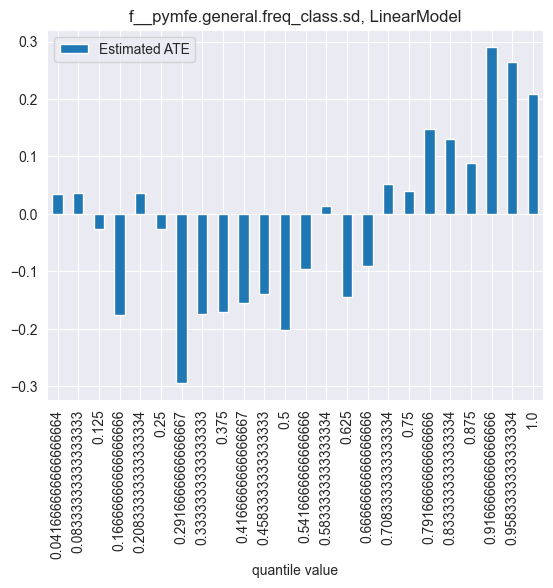

In [65]:
df_results.plot(x="quantile value", y="Estimated ATE", kind="bar", title=f"{feature}, {model_name}")


In [68]:
observed_data = x_test_scaled.sample(1)

cf_high = gcm.counterfactual_samples(
    causal_gcm,
    {feature: lambda x: 1.0},
    observed_data=observed_data
)

cf_low = gcm.counterfactual_samples(
    causal_gcm,
    {feature: lambda x: 0.0},
    observed_data=observed_data
)

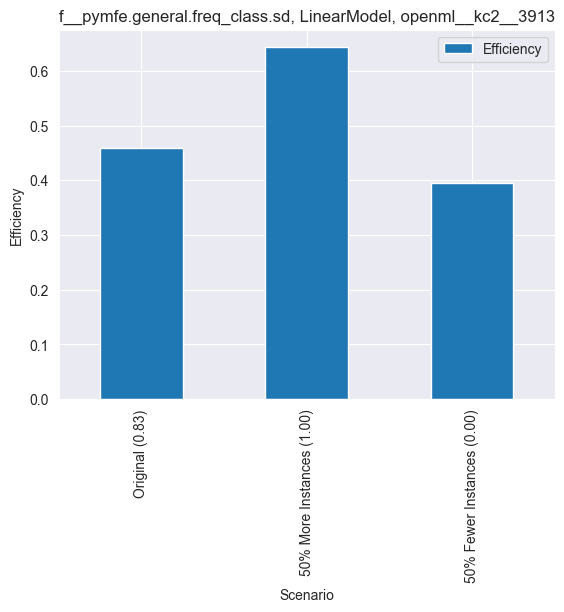

In [69]:
df_plot = pd.DataFrame({
    "Scenario": [
        f"Original ({observed_data[feature].values[0]:.2f})", 
        f"50% More Instances ({cf_high[feature].values[0]:.2f})", 
        f"50% Fewer Instances ({cf_low[feature].values[0]:.2f})"
    ],
    "Efficiency": [observed_data["outcome"].values[0], cf_high["outcome"].values[0], cf_low["outcome"].values[0]]
})

df_plot.plot(x="Scenario", y="Efficiency", kind="bar", title=f"{feature}, {model_name}, {observed_data.index[0]}")
plt.ylabel("Efficiency")
plt.show()